In [1]:
import rosbag

In [2]:
import rospy

In [3]:
from geometry_msgs.msg import AccelStamped

In [4]:
from acronis_common.msg import StampedFloat64

In [5]:
from prius_msgs.msg import Control

In [6]:
import matplotlib.pyplot as plt

In [7]:
bag = rosbag.Bag('bagfile/compare_new.bag')

In [8]:
coms_accel_value = []
coms_accel_t = []

coms_steer_value = []
coms_steer_t = []

expected_accel_value = []
expected_accel_t = []

expected_steer_value = []
expected_steer_t = []

ecu_steer_value = []
ecu_steer_t = []

In [9]:
for topic, msg, t in bag.read_messages():
    if topic == '/coms/accel':
        coms_accel_value.append(msg.accel.linear.x)
        coms_accel_t.append(msg.header.stamp.to_sec())
        
    elif topic == '/coms/steering':
        coms_steer_value.append(msg.value)
        coms_steer_t.append(msg.header.stamp.to_sec())
        
    elif topic == '/expected_accel':
        expected_accel_value.append(msg.accel.linear.x)
        expected_accel_t.append(msg.header.stamp.to_sec())
        
    elif topic == '/expected_steer':
        expected_steer_value.append(msg.value)
        expected_steer_t.append(msg.header.stamp.to_sec())
        
    elif topic == '/prius':
        ecu_steer_value.append(msg.steer)
        ecu_steer_t.append(msg.header.stamp.to_sec())

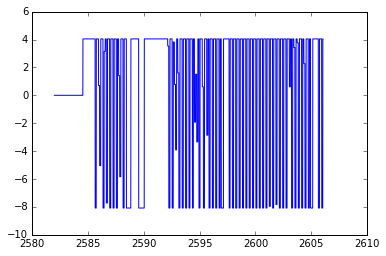

In [10]:
plt.plot(coms_accel_t, coms_accel_value)

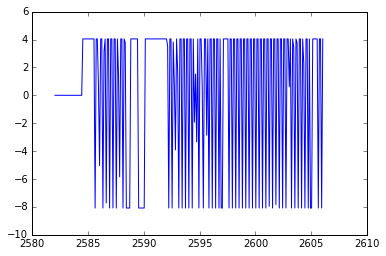

In [11]:
plt.plot(expected_accel_t, expected_accel_value)

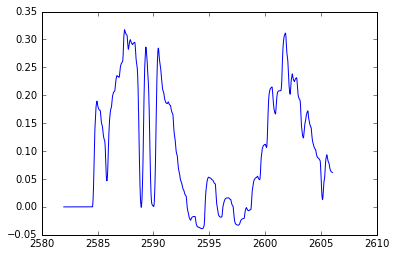

In [12]:
plt.plot(coms_steer_t, coms_steer_value)
#newcoms_steer = []
#for i in coms_steer_value:
#    newcoms_steer.append(i*0.5)
#plt.plot(coms_steer_t, newcoms_steer)

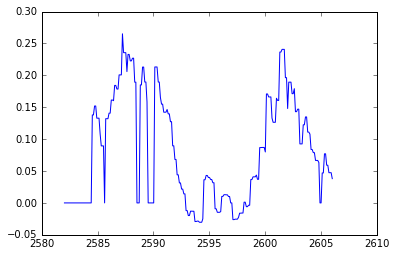

In [13]:
# plt.plot(expected_steer_t, expected_steer_value)
newexp_steer = []
for i in expected_steer_value:
    newexp_steer.append(i/0.6458)
plt.plot(expected_steer_t, newexp_steer)

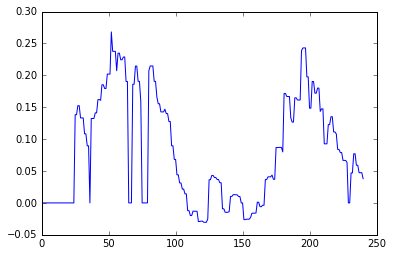

In [15]:
plt.plot(ecu_steer_value) # 可见 my_steer 与 ecu 之间只差了 max_steer，我认为不应该除以这个 max_steer